# 📓 MNIST Digits - Classification Models

# 1. Introduction
In this notebook, we use the MNIST dataset (28x28 grayscale digits) to train and evaluate
different machine learning models. 
Our focus is on comparing traditional ML algorithms on vision data:
- KNN (simple similarity-based method)
- SVM (powerful for classification in high dimensions)
- PCA + Logistic Regression (using dimensionality reduction before classification)

## Key questions:
- How well do classical ML methods perform on MNIST?
- Does PCA help with training speed and accuracy?
- What are the limitations of ML for vision tasks?




In [1]:
# ## 2. Load Libraries & Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (56000, 784)
Test shape: (14000, 784)


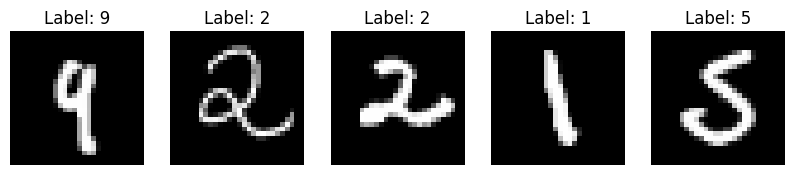

In [2]:
# ## 3. Data Preview
# Show some random images from MNIST

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis("off")
plt.show()


In [3]:
# ## 4. Preprocessing
# Scale the data (important for SVM & Logistic Regression)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# ## 5. KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9465
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.94      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.95      0.94      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [5]:
# ## 6. SVM Model
svm = SVC(kernel="rbf", gamma="scale")
svm.fit(X_train_scaled[:5000], y_train[:5000])  # train on subset for speed
y_pred_svm = svm.predict(X_test_scaled[:2000])  # test subset

print("SVM Accuracy:", accuracy_score(y_test[:2000], y_pred_svm))
print(classification_report(y_test[:2000], y_pred_svm))


SVM Accuracy: 0.9305
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       189
           1       0.95      0.96      0.96       216
           2       0.84      0.95      0.89       190
           3       0.93      0.88      0.90       230
           4       0.93      0.94      0.93       158
           5       0.91      0.95      0.93       200
           6       0.97      0.94      0.96       205
           7       0.93      0.93      0.93       204
           8       0.93      0.90      0.91       200
           9       0.95      0.89      0.92       208

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
# ## 7. PCA + Logistic Regression
pca = PCA(n_components=200)  # reduce from 784 → 200 dimensions
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)
y_pred_pca_lr = log_reg.predict(X_test_pca)

print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca_lr))
print(classification_report(y_test, y_pred_pca_lr))


PCA + Logistic Regression Accuracy: 0.9222142857142858
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.95      0.97      0.96      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.95      0.96      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



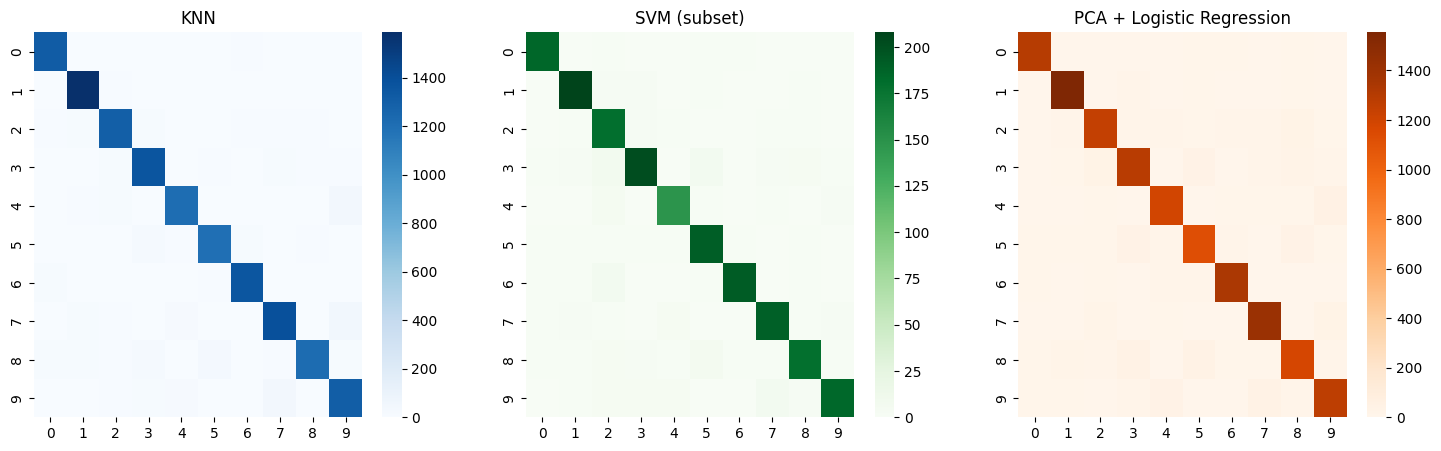

In [22]:
# ## 8. Confusion Matrices

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=False, cmap="Blues", ax=axes[0])
axes[0].set_title("KNN")

# SVM
sns.heatmap(confusion_matrix(y_test[:2000], y_pred_svm), annot=False, cmap="Greens", ax=axes[1])
axes[1].set_title("SVM (subset)")

# PCA + LR
sns.heatmap(confusion_matrix(y_test, y_pred_pca_lr), annot=False, cmap="Oranges", ax=axes[2])
axes[2].set_title("PCA + Logistic Regression")

plt.show()


In [23]:
# ## 9. Summary & Insights
# We'll compare accuracy scores

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test[:2000], y_pred_svm)
acc_pca_lr = accuracy_score(y_test, y_pred_pca_lr)

print("📊 Accuracy Comparison")
print(f"KNN: {acc_knn:.4f}")
print(f"SVM (subset): {acc_svm:.4f}")
print(f"PCA + Logistic Regression: {acc_pca_lr:.4f}")


📊 Accuracy Comparison
KNN: 0.9465
SVM (subset): 0.9305
PCA + Logistic Regression: 0.9222
